# PART A
## Domain: Automobile

### 1.Data understanding and exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [2]:
df1 = pd.read_csv("Car_name.csv")
df1.head(10)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
5,ford galaxie 500
6,chevrolet impala
7,plymouth fury iii
8,pontiac catalina
9,amc ambassador dpl


In [3]:
df1.shape

(398, 1)

In [4]:
df2 = pd.read_json("Car-Attributes.json")

In [5]:
df2.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [6]:
df2.shape

(398, 8)

In [7]:
df3 = pd.concat([df1,df2], axis=1, sort=False)
df3.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [8]:
df3.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Data preparation and analysis

In [9]:
df3['origin'].unique()

array([1, 3, 2], dtype=int64)

In [10]:
df3 = pd.get_dummies(df3, columns=['origin'])
df3.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [11]:
df3 = df3.drop('car_name', axis=1)

In [12]:
df3.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
dtype: object

In [13]:
hpIsDigit = pd.DataFrame(df3.hp.str.isdigit())
df3[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [14]:
df3 = df3.replace('?', np.nan)
df3[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [15]:
df3.median()

mpg           23.0
cyl            4.0
disp         148.5
hp            93.5
wt          2803.5
acc           15.5
yr            76.0
origin_1       1.0
origin_2       0.0
origin_3       0.0
dtype: float64

In [16]:
medianFiller = lambda x: x.fillna(x.median())
df3 = df3.apply(medianFiller,axis=0)
df3['hp'] = df3['hp'].astype('float64')

In [17]:
df3.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
dtype: object

In [18]:
dupe=df3.duplicated()
sum(dupe)

0

In [19]:
df3.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0,0


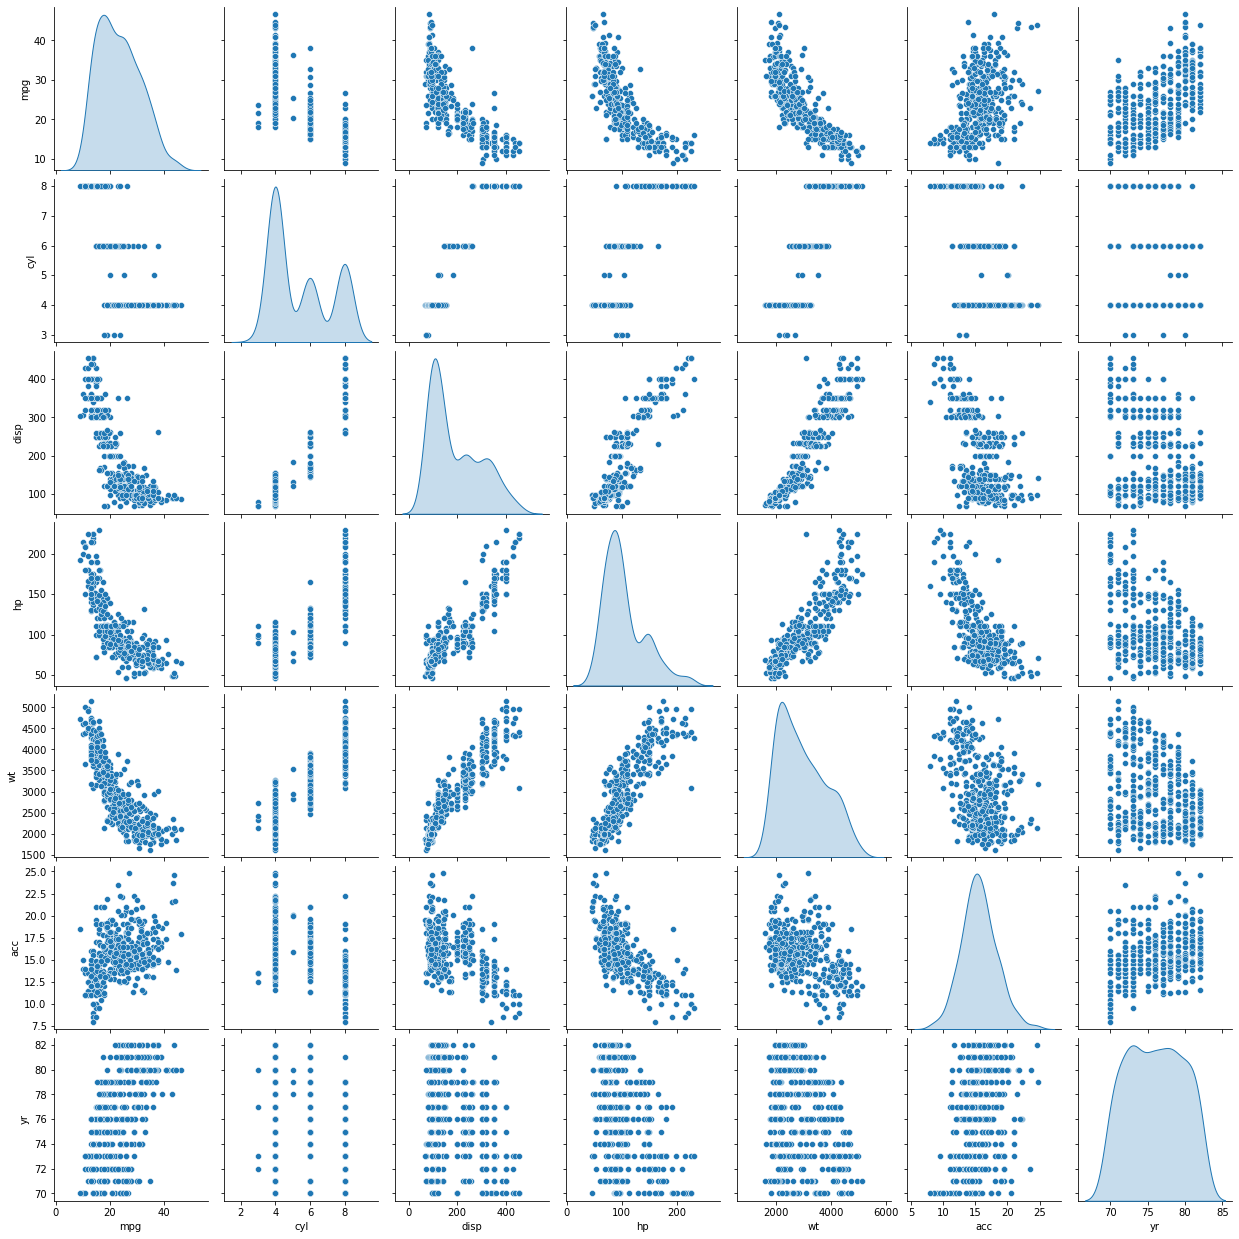

In [20]:
df3_attr = df3.iloc[:, 0:7]
sns.pairplot(df3_attr, diag_kind='kde')

<AxesSubplot:xlabel='wt', ylabel='disp'>

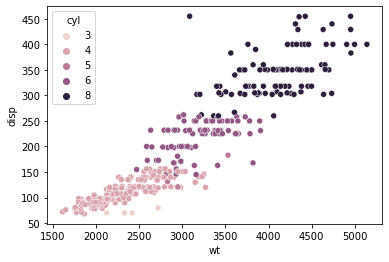

In [21]:
sns.scatterplot(x='wt',y='disp', hue='cyl', data=df3)

The above plot shows that it has positive linear  relationship between weight and displacement which means as the weight of the car increase its displacement in cc also increases

<AxesSubplot:xlabel='wt', ylabel='mpg'>

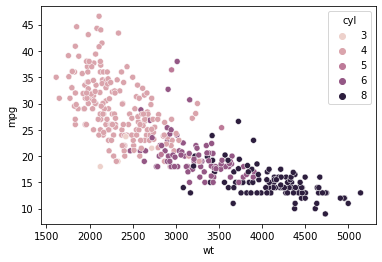

In [22]:
sns.scatterplot(x='wt',y='mpg', hue='cyl', data=df3)

The above plot shows that it has negative linear relationship between weight and miles per gallon which means as the weight of the car increase its mpg decreases

In [23]:
df4=df3.apply(zscore)
df4.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0.773559,-0.461968,-0.497643
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.773559,-0.461968,-0.497643
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.773559,-0.461968,-0.497643
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.773559,-0.461968,-0.497643
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.773559,-0.461968,-0.497643
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,0.773559,-0.461968,-0.497643
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,0.773559,-0.461968,-0.497643
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,0.773559,-0.461968,-0.497643
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,0.773559,-0.461968,-0.497643
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,0.773559,-0.461968,-0.497643


### Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

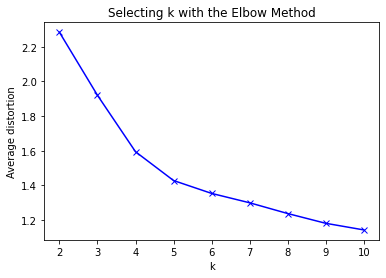

In [24]:
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df4)
    prediction=model.predict(df4)
    meanDistortions.append(sum(np.min(cdist(df4, model.cluster_centers_, 'euclidean'), axis=1)) / df4.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In the above plot the best elbow point is 4 and 5. We have to check its clusters for both 4 and 5

In [25]:
final_model=KMeans(4)
final_model.fit(df4)
prediction=final_model.predict(df4)
 
df3["GROUP"] = prediction
df4["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head(10)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,1
5,15.0,8,429.0,198.0,4341,10.0,70,1,0,0,1
6,14.0,8,454.0,220.0,4354,9.0,70,1,0,0,1
7,14.0,8,440.0,215.0,4312,8.5,70,1,0,0,1
8,14.0,8,455.0,225.0,4425,10.0,70,1,0,0,1
9,15.0,8,390.0,190.0,3850,8.5,70,1,0,0,1


In [26]:
df5 = df3.groupby(['GROUP'])
df5.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
GROUP,,,,,,,,,,
0,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038,0.0,0.0,1.0
1,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.0,0.0,0.0
2,23.686577,5.087248,178.473154,90.510067,2848.523490,16.585906,76.859060,1.0,0.0,0.0
3,27.891429,4.157143,109.142857,80.928571,2423.300000,16.787143,75.814286,0.0,1.0,0.0


In [27]:
final_model=KMeans(5)
final_model.fit(df4)
prediction=final_model.predict(df4)
 
df3["GROUP"] = prediction
df4["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head(10)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,1
5,15.0,8,429.0,198.0,4341,10.0,70,1,0,0,1
6,14.0,8,454.0,220.0,4354,9.0,70,1,0,0,1
7,14.0,8,440.0,215.0,4312,8.5,70,1,0,0,1
8,14.0,8,455.0,225.0,4425,10.0,70,1,0,0,1
9,15.0,8,390.0,190.0,3850,8.5,70,1,0,0,1


In [28]:
df5 = df3.groupby(['GROUP'])
df5.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
GROUP,,,,,,,,,,
0,27.877922,4.129870,128.707792,83.136364,2460.467532,16.364935,78.194805,1.0,0.0,0.0
1,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866,1.0,0.0,0.0
2,27.891429,4.157143,109.142857,80.928571,2423.300000,16.787143,75.814286,0.0,1.0,0.0
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038,0.0,0.0,1.0
4,19.265333,6.186667,234.146667,99.260000,3276.000000,16.761333,75.520000,1.0,0.0,0.0


<AxesSubplot:xlabel='wt', ylabel='mpg'>

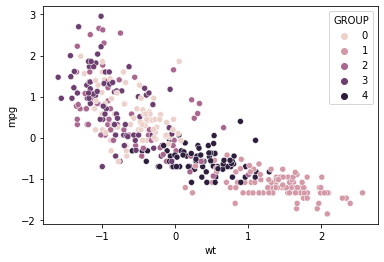

In [29]:
sns.scatterplot(x='wt',y='mpg', hue='GROUP', data=df4)

In [30]:
from mpl_toolkits.mplot3d import Axes3D


C:\Users\arunv\AppData\Local\Temp/ipykernel_26224/4165169933.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
C:\Users\arunv\AppData\Local\Temp/ipykernel_26224/4165169933.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df4.iloc[:, 0], df4.iloc[:, 1], df4.iloc[:, 3],c=labels.astype(n

Text(0.5, 0.92, '3D plot of KMeans Clustering')

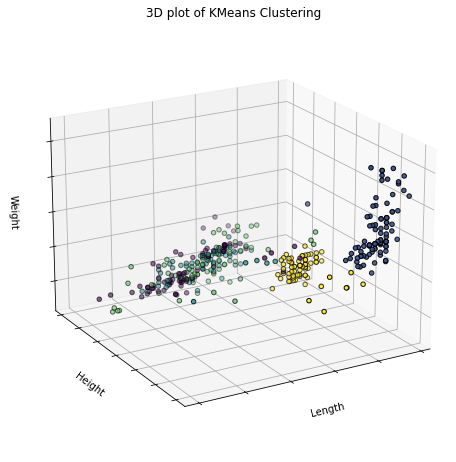

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
final_model=KMeans(5)
final_model.fit(df4)

labels = final_model.labels_
ax.scatter(df4.iloc[:, 0], df4.iloc[:, 1], df4.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

Five cluster is best approach as we can group based on no.of cylinders which cluster datapoint based on all other variables include mpg, weight, displacement, horsepower. Refer pairplot.

# Part B
## Domain: Automobile

### Data understanding and cleaning

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split

from scipy.stats import zscore

In [33]:
ndf1 = pd.read_csv("vehicle.csv")
ndf1.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [34]:
dup=ndf1.duplicated()
sum(dup)

0

In [35]:
ndf1.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [36]:
ndf1.shape

(846, 19)

In [37]:
ndf1.dropna(inplace=True)

In [38]:
ndf1.shape

(813, 19)

In [39]:
pd.value_counts(ndf1['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

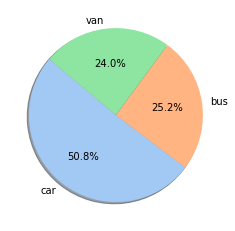

In [40]:
labels = ['car', 'bus', 'van']
colors = sns.color_palette('pastel')[0:5]
plt.pie(pd.value_counts(ndf1['class']), labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [41]:
ndf1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [42]:
ndf1.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ndf1['class']=le.fit_transform(ndf1['class'])
ndf1['class'].value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

### Data preparation

In [44]:
X = ndf1.drop(['class'],axis=1)
Y = ndf1[['class']]

X1 = X.apply(zscore)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.30, random_state=1)
x_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
433,-1.052030,-0.456333,-0.763506,-1.163826,-0.724754,-0.342087,-0.561474,0.514333,-0.606014,-0.199490,-0.365291,-0.630172,-0.069700,1.284933,0.741741,0.147109,-1.297435,-1.451050
129,0.770861,0.520408,0.821445,1.187734,0.781252,-0.342087,0.920598,-1.152637,0.949438,0.145439,0.886848,0.951216,0.796844,0.080339,0.131793,-0.189159,0.491213,-0.233885
90,1.256966,1.659939,1.582222,1.574700,0.781252,0.513657,1.495279,-1.280865,1.338300,1.732113,1.400546,1.510697,1.694336,-0.187348,-0.681472,-0.301249,-0.159204,0.442318
459,0.527809,-0.456333,0.504455,0.681702,-0.097251,0.085785,0.285424,-0.511494,0.171712,-0.268476,0.019982,0.237593,-1.121931,-1.525787,-0.681472,-0.525427,1.629444,1.659484
734,-0.687452,-0.781913,-1.714476,-1.640091,-1.101255,-0.342087,-1.105908,1.540161,-0.994877,-0.613406,-1.489006,-1.081182,-0.502972,1.954153,-1.291420,-0.637516,-2.110457,-1.721531


In [46]:
x_train.shape

(569, 18)

In [47]:
x_test.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
381,1.500018,1.497149,1.138435,1.723533,0.655752,-0.983895,2.463162,-1.793779,2.504889,0.973269,2.941640,2.766673,2.715620,2.087996,-0.274839,-0.189159,-1.134831,-1.856772
777,1.500018,1.334359,1.011639,-0.449428,-1.854258,-0.983895,2.069959,-1.665551,2.116026,1.111241,2.395836,2.281409,1.477700,1.284933,-0.478156,0.483376,-0.647017,-1.586291
570,1.378492,1.334359,1.645620,1.098434,0.153750,0.727593,1.616264,-1.280865,1.727163,1.387184,1.207909,1.562077,0.827792,-0.187348,1.758322,2.500984,0.003400,0.983281
837,0.041705,0.194828,-0.319719,-0.002929,-0.222752,-0.128151,-0.319503,0.129648,-0.217151,0.007467,-0.236867,-0.373268,0.208832,-0.722724,1.148374,-1.197963,0.653818,0.442318
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040


### Model building

In [48]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train.values.ravel())

prediction = svc_model .predict(x_train)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train, prediction, digits=2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       152
           1       0.98      0.92      0.95       274
           2       0.92      0.99      0.96       143

    accuracy                           0.95       569
   macro avg       0.94      0.95      0.94       569
weighted avg       0.95      0.95      0.95       569



In [50]:
svc_model.score(x_train, y_train)

0.945518453427065

In [51]:
svc_model.score(x_test, y_test)

0.9016393442622951

#                                                     PCA

In [52]:
covMatrix = np.cov(x_train,rowvar=False)
print(covMatrix)

[[ 0.97816435  0.65178069  0.7441021   0.67543876  0.10479789  0.16921324
   0.78789303 -0.7582437   0.79497239  0.62741354  0.75203633  0.79764108
   0.55355332 -0.21221774  0.20940039  0.08672223  0.27319764  0.32501522]
 [ 0.65178069  0.95553434  0.73724659  0.59219653  0.14922326  0.22846758
   0.8103369  -0.77848245  0.81255621  0.90552399  0.7700109   0.80582454
   0.9047821   0.06983204  0.11996442 -0.06236744 -0.11070206  0.0258279 ]
 [ 0.7441021   0.73724659  0.93150416  0.74261665  0.17435598  0.26134229
   0.85298389 -0.85764605  0.84654962  0.69879783  0.82165198  0.83880815
   0.66068512 -0.21569959  0.08667858  0.20218791  0.14038399  0.32076822]
 [ 0.67543876  0.59219653  0.74261665  0.97635776  0.62578014  0.36611619
   0.72453167 -0.78280524  0.69980342  0.52623381  0.78654322  0.71497855
   0.52007547 -0.19393485  0.0211467   0.11030482  0.40269834  0.48151745]
 [ 0.10479789  0.14922326  0.17435598  0.62578014  0.88041248  0.47036601
   0.12321453 -0.20852531  0.09239

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train)

PCA(n_components=10)

In [54]:
print(pca.explained_variance_)

[8.98411636 2.95042006 1.54601523 1.13824634 0.91986489 0.52136469
 0.38046995 0.22371667 0.14527534 0.09062951]


In [55]:
print(pca.components_)

[[ 0.27752257  0.29222961  0.29937987  0.27291994  0.08523752  0.09318211
   0.31783243 -0.3149854   0.31621922  0.27404791  0.31364341  0.31627829
   0.27217666 -0.02032456  0.03352768  0.03767635  0.03368936  0.07493386]
 [-0.10742925  0.1378387  -0.07139419 -0.20412365 -0.14800949  0.0072683
   0.04344361  0.01936122  0.05539261  0.12774055  0.0597386   0.04692041
   0.21257657  0.48658015 -0.0285801  -0.0957466  -0.53692232 -0.54138613]
 [-0.13182087 -0.02462945 -0.06093346  0.28217071  0.6540787   0.5171908
  -0.09970261  0.0482697  -0.12127652 -0.02225205  0.08007602 -0.111714
  -0.01551498  0.3424963  -0.14834314 -0.12509799  0.01825285  0.03846406]
 [ 0.08585826  0.18403454 -0.07260838 -0.04735067  0.0255019   0.03652524
  -0.09507645  0.09114419 -0.09373384  0.18602065 -0.12086427 -0.09032678
   0.18566391 -0.06717086  0.62116245 -0.65391996  0.10226832  0.053494  ]
 [ 0.08044601 -0.10457573  0.0504769  -0.01559507 -0.00202403  0.24324384
  -0.01769756  0.06483551 -0.00155753 

In [56]:
print(pca.explained_variance_ratio_)

[0.52571975 0.17264849 0.09046752 0.06660628 0.05382735 0.03050848
 0.0222638  0.01309113 0.00850102 0.00530333]


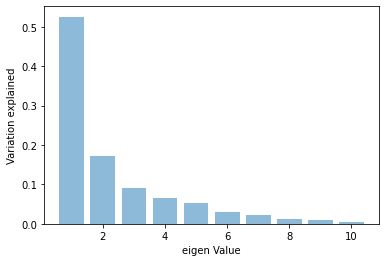

In [57]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

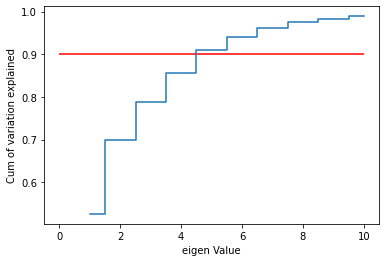

In [58]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.hlines(y=0.9,xmin=0, xmax=10, colors = 'r')
plt.show()

If we chose the minimum number of components to be 5 we have 90% variance

In [59]:
pca3 = PCA(n_components=5)
pca3.fit(x_train)
print(pca3.components_)
print('\n',pca3.explained_variance_ratio_)
X_pca = pca3.transform(x_train)

[[ 0.27752257  0.29222961  0.29937987  0.27291994  0.08523752  0.09318211
   0.31783243 -0.3149854   0.31621922  0.27404791  0.31364341  0.31627829
   0.27217666 -0.02032456  0.03352768  0.03767635  0.03368936  0.07493386]
 [-0.10742925  0.1378387  -0.07139419 -0.20412365 -0.14800949  0.0072683
   0.04344361  0.01936122  0.05539261  0.12774055  0.0597386   0.04692041
   0.21257657  0.48658015 -0.0285801  -0.0957466  -0.53692232 -0.54138613]
 [-0.13182087 -0.02462945 -0.06093346  0.28217071  0.6540787   0.5171908
  -0.09970261  0.0482697  -0.12127652 -0.02225205  0.08007602 -0.111714
  -0.01551498  0.3424963  -0.14834314 -0.12509799  0.01825285  0.03846406]
 [ 0.08585826  0.18403454 -0.07260838 -0.04735067  0.0255019   0.03652524
  -0.09507645  0.09114419 -0.09373384  0.18602065 -0.12086427 -0.09032678
   0.18566391 -0.06717086  0.62116245 -0.65391996  0.10226832  0.053494  ]
 [ 0.08044601 -0.10457573  0.0504769  -0.01559507 -0.00202403  0.24324384
  -0.01769756  0.06483551 -0.00155753 

In [60]:
X_pca

array([[-2.06066105,  2.39308654, -0.3335332 ,  0.16658799,  0.8903255 ],
       [ 2.82940139, -0.14446432,  0.2391835 , -0.02298225, -0.20880935],
       [ 5.0763107 ,  0.21459272,  0.52833015, -0.01168739, -0.92662131],
       ...,
       [-1.25337253,  1.01634514,  0.60059503,  0.59803948, -1.64654978],
       [-0.27857787,  0.78489178,  1.05498126,  0.02409417, -0.61372978],
       [-5.2783428 ,  2.49652155, -0.56853297, -0.30105132,  1.10274936]])

In [61]:
svc_model = SVC(C= 1, kernel='linear', gamma= 0.1)
svc_model.fit(X_pca, y_train.values.ravel())
svc_model.score(X_pca, y_train)

0.664323374340949

In [62]:
from sklearn.metrics import classification_report
pred = svc_model .predict(X_pca)
print(classification_report(y_train, pred, digits=2))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       152
           1       0.74      0.81      0.77       274
           2       0.57      0.52      0.54       143

    accuracy                           0.66       569
   macro avg       0.63      0.62      0.63       569
weighted avg       0.66      0.66      0.66       569



Reducing the dimensionality reduces the R^2 score by 30%. Hence for the above dataset reducing dimensionality reduces the accuracy.

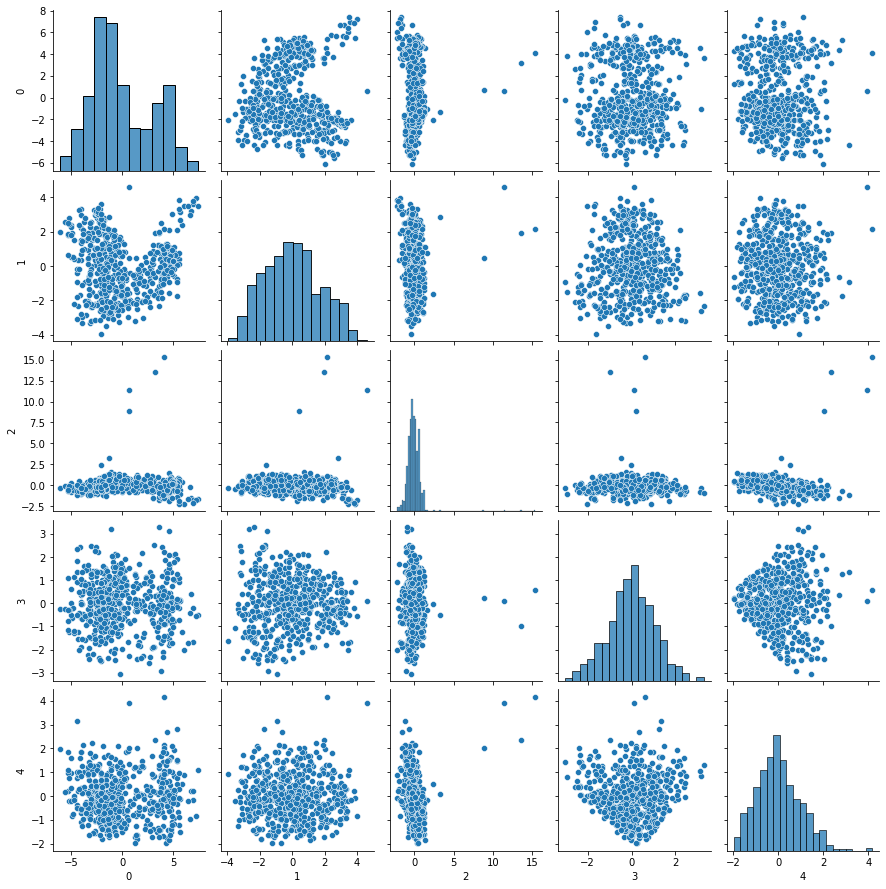

In [63]:
sns.pairplot(pd.DataFrame(X_pca))

### Performance improvement

In [64]:
y_train.shape

(569, 1)

In [65]:
df = pd.DataFrame(data = X_pca) 
df.head(10)  
df.shape

(569, 5)

In [66]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df, y_train, test_size=0.30, random_state=1)

In [67]:
x_train1.shape

(398, 5)

In [68]:
y_train1.shape

(398, 1)

In [69]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train1, y_train1.values.ravel())
svc_model.score(x_train1, y_train1)

0.6809045226130653

In [70]:
predict = svc_model .predict(x_train1)
print(classification_report(y_train1, predict, digits=2))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       109
           1       0.75      0.82      0.78       190
           2       0.60      0.54      0.57        99

    accuracy                           0.68       398
   macro avg       0.65      0.64      0.65       398
weighted avg       0.67      0.68      0.68       398



In [71]:
svc_model = SVC(C= 5, kernel='poly', gamma= 1)
svc_model.fit(x_train1, y_train1.values.ravel())
print(svc_model.score(x_train1, y_train1))

predict = svc_model .predict(x_train1)
print('\n',classification_report(y_train1, predict, digits=2))

0.8241206030150754

               precision    recall  f1-score   support

           0       0.82      0.81      0.81       109
           1       0.84      0.88      0.86       190
           2       0.80      0.73      0.76        99

    accuracy                           0.82       398
   macro avg       0.82      0.81      0.81       398
weighted avg       0.82      0.82      0.82       398



The data trained with all the variables in the support vector machines has high R^2 than the data with reduced variables. This is due to under fitting of data which means we didn't have enough data to build the model.

### Data understanding and cleaning

Principal Component Analysis (PCA) is useful for visualizing high-dimensional datasets, as it can compress it down to the dimensions we need. It's also useful for reducing the dimensionality of high-dimensional datasets, which require exponentially more data as the number of dimensions increase, but we didn't need to do that in this case because the dataset was rather small.

### Advantages
 Decreases computational times for fitting models                                                                               
 Makes visualization easier                                                                                                  
 Decreases storage requirements                                                                                               
 Helps reduce over fitting                                          

### Disadvantages

Information loss                                                                                                               
Data standardization is important                                                                                              
When we are in a situation to find a particular variable which affects the outout and to find the relationship it is not possible